dist_plot.get_figure().savefig("thirtyyear_dist_plot.png", bbox_inches="tight")# Unit 5 - Financial Planning

In [1]:
# Initial imports

from alpaca_trade_api.rest import REST, TimeFrame, TimeFrameUnit
import os
import requests
import pandas as pd
from dotenv import load_dotenv

import alpaca_trade_api as trade_api
from MCForecastTools import MCSimulation
from datetime import datetime


%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

Python-dotenv could not parse statement starting at line 2
Python-dotenv could not parse statement starting at line 10
Python-dotenv could not parse statement starting at line 13
Python-dotenv could not parse statement starting at line 14
Python-dotenv could not parse statement starting at line 16
Python-dotenv could not parse statement starting at line 17
Python-dotenv could not parse statement starting at line 22


True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_BTC = 1.2
my_ETH = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_fetch = requests.get(btc_url).json()
btc_price = btc_fetch["data"]["1"]["quotes"]["CAD"]["price"]

# Fetch current ETH price
eth_fetch = requests.get(eth_url).json()
eth_price = eth_fetch["data"]["1027"]["quotes"]["CAD"]["price"]

# Compute current value of my crpto
my_btc_value = my_BTC * btc_price
my_eth_value = my_ETH * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_BTC} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_ETH} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $60363.55
The current value of your 5.3 ETH is $20083.96


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
alpaca_api_key = 'PKTGY881DO08HLLT7EYO'
alpaca_secret_key = 'nqDoDV6zcGJymp3F9iCoH4iHcspGerwUnbrud2AT'

In [8]:
alpaca_secret_key 

'nqDoDV6zcGJymp3F9iCoH4iHcspGerwUnbrud2AT'

In [9]:
# set up object to run api
today = pd.Timestamp("2022-03-28", tz="America/Toronto").isoformat()


In [10]:
tickers = ["AGG", "SPY"]

In [11]:
timeframe = "1Day"

In [12]:

#api_alpaca = tradeapi.REST(alpaca_api_key,alpaca_secret_key,api_version='v2')
portfolio_df = trade_api.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')

portfolio_df = portfolio_df.get_bars(tickers,timeframe,start = today, end = today).df

In [13]:
portfolio_df

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-03-28 04:00:00+00:00,106.25,106.5252,106.16,106.36,8540551,27246,106.295912,AGG
2022-03-28 04:00:00+00:00,452.05,455.9100,450.06,455.84,68744767,624225,453.296491,SPY


In [14]:
AGG = portfolio_df[portfolio_df['symbol']=='AGG'].drop('symbol', axis=1)
SPY = portfolio_df[portfolio_df['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
portfolio_df = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Preview DataFrame
portfolio_df

AGG                                     \
                             open      high     low   close   volume   
timestamp                                                              
2022-03-28 04:00:00+00:00  106.25  106.5252  106.16  106.36  8540551   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2022-03-28 04:00:00+00:00       27246  106.295912  452.05  455.91  450.06   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2022-03-28 04:00:00+00:00  455.84  68744767      624225  453.296491

In [16]:
agg_close_price = float(portfolio_df["AGG"]["close"])
spy_close_price = float(portfolio_df["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $106.36
Current SPY closing price: $455.84


In [17]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22792.00
The current value of your 200 AGG shares is $21272.00


### Savings Health Analysis

In [18]:
# Set monthly household income
# Create a varible monthly and set the its value to 20000
monthly = 20000

# Create savings DataFrame
df_savings = pd.DataFrame([my_btc_value + my_eth_value, my_agg_value + my_spy_value], columns=["amount"], index=["crypto", "shares"])


# Display savings DataFrame
display(df_savings)

,amount
crypto,80447.508443
shares,44064.000000


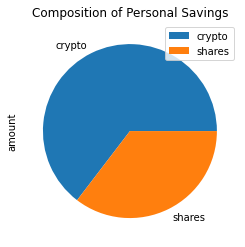

In [20]:
# Plot savings pie chart
pie_chart = df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [21]:
pie_chart.get_figure().savefig("Composition of Personal Savings.png", bbox_inches="tight")

In [24]:
# Set ideal emergency fund
emergency_fund = monthly * 3

In [25]:
# Calculate total amount of savings
total_savings = df_savings["amount"].sum()
total_savings

124511.508443

In [27]:
# Validate saving health
if total_savings > emergency_fund:
    print(f"Congratulations! You have enough money for your emergency fund.")
elif total_savings == emergency_fund:
    print(f" Your savings is equal to your emergency fund.")
else:
    print(f"You don't have enough money in your emergency fund. You will need ${emergency_fund - total_savings} to reach your financial goal") 


Congratulations! You have enough money for your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [29]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [30]:
# Get 5 years' worth of historical data for SPY and AGG
historical_data = trade_api.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')

df_stock_data = historical_data.get_bars(tickers, timeframe, start=start_date, end=end_date).df

df_stock_data

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2016-05-02 04:00:00+00:00,110.74,110.7400,110.5200,110.61,3553939,15119,110.627199,AGG
2016-05-03 04:00:00+00:00,110.89,110.9450,110.7500,110.81,3044940,15662,110.865995,AGG
2016-05-04 04:00:00+00:00,110.91,110.9315,110.7595,110.86,2920608,13982,110.879063,AGG
2016-05-05 04:00:00+00:00,110.92,111.1600,110.8010,111.14,3008142,15707,111.028363,AGG
2016-05-06 04:00:00+00:00,111.12,111.1200,110.9700,110.97,2718710,12697,111.031967,AGG


In [31]:
# Reorganize the DataFrame
# Separate ticker data
AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
# YOUR CODE HERE!
df_stock_data = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Display sample data
df_stock_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2016-05-02 04:00:00+00:00       15119  110.627199  206.90  208.18  206.41   
2016-05-03 04:00:00+00:00       15662  110.865995  206.50  206.80  205.28   
2016-05-04 04:00:00+00:00       13982  110.879063  205.00  205.85  204.42   
2016-05-05 04:00:00+00:00       15707  111.028363  205.57  205.98  204.47   
2016-05-06 04:00:00+00:00       12697  111.031967  204.04  205.77  203.88   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2016-05-02 04:00:00+00:00  208.03   61908515      263580  207.294812  
2016-05-03 04:00:00+00:00  206.13  106422142      377518  206.312060  
2016-05-04 04:00:00+00:00  204.96   92199810      345261  205.090172  
2016-05-05 04:00:00+00:00  204.95   67597222      280622  205.141555  
2016-05-06 04:00:00+00:00  205.70   89131004      340335  204.937074

In [33]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [34]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.90   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001808  206.50   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  205.00   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.57   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.04   

                                                                          \
                             high     low   close     volume trade_count   
timestamp                                                                  
2016-05-02 04:00:00+00:00  208.18  206.41  208.03   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.13  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  204.96   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.95   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.70   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.009133  
2016-05-04 04:00:00+00:00  205.090172    -0.005676  
2016-05-05 04:00:00+00:00  205.141555    -0.000049  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [35]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/createX/Documents/GitHub/api_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.008039,0.997671,0.995865,0.991925,1.003302,1.001511,0.994794,0.999430,0.996071,1.001158,...,1.001738,1.008522,0.988779,1.000906,1.006905,1.004038,0.987380,1.007913,1.008931,1.011932
2,1.013831,1.015482,0.993972,0.997853,1.009351,1.002563,0.993274,0.992923,0.998606,1.003861,...,1.007927,1.014225,0.997137,0.995358,1.009850,0.994398,0.979238,1.006112,0.996214,1.008319
3,1.015270,1.013347,0.990946,0.978998,1.012302,0.996241,0.994476,0.997416,1.003708,1.002141,...,0.999349,1.010597,1.012529,0.982052,1.013007,1.001158,0.965970,1.005961,0.989419,1.006889
4,1.011896,1.015163,0.986317,0.975652,1.007384,1.013917,0.990885,0.997458,1.009957,0.998931,...,1.008665,1.003956,1.022089,0.974773,1.008988,1.011975,0.974336,1.004937,0.993397,1.001730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,9.328849,6.450967,14.871727,24.234147,22.888561,30.042980,15.974314,11.073958,19.715662,13.844777,...,18.783942,8.665262,18.585882,23.334358,20.012400,27.624788,40.994342,27.551135,15.411726,9.426984
7557,9.255366,6.461821,14.977003,24.696368,22.776384,30.428999,15.868194,11.202136,19.728193,13.840325,...,18.724508,8.708927,18.440480,23.156426,19.929958,27.917101,41.095016,27.833081,15.361001,9.447761
7558,9.246938,6.472402,15.003017,24.833804,22.923566,30.617224,16.036831,11.339265,19.900890,13.700201,...,18.799459,8.683612,18.493259,23.327543,20.213327,27.587811,40.993875,27.833478,15.391926,9.404102
7559,9.198044,6.438167,14.713406,25.069412,23.213554,30.706461,15.991340,11.287172,19.947985,13.764158,...,18.966263,8.640333,18.446169,23.442894,20.140485,27.704846,41.385988,28.126596,15.500155,9.378619


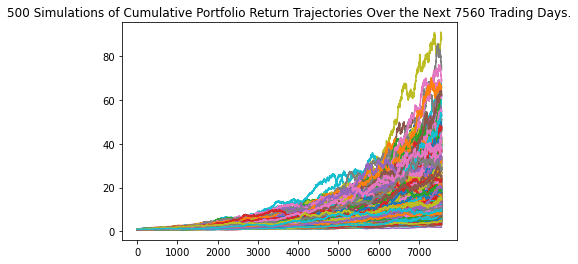

In [37]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()


In [39]:
line_plot.get_figure().savefig("MC_thirtyyear_sim_plot.png", bbox_inches="tight")

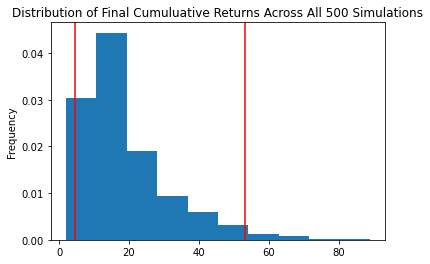

In [38]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()

In [40]:
dist_plot.get_figure().savefig("thirtyyear_dist_plot.png", bbox_inches="tight")

### Retirement Analysis

In [41]:
# Fetch summary statistics from the Monte Carlo simulation results
retirement = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(retirement)

count           500.000000
mean             18.755067
std              12.772558
min               1.919699
25%              10.376146
50%              15.185326
75%              23.328848
max              88.942831
95% CI Lower      4.421691
95% CI Upper     53.217046
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [44]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(retirement[8]*20000,2)
ci_upper = round(retirement[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $88433.81 and $1064340.91


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [45]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(retirement[8]*30000,2)
ci_upper = round(retirement[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $132650.72 and $1596511.37


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [46]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [47]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/createX/Documents/GitHub/api_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003514,1.008716,0.997341,0.997527,0.988669,1.016750,1.008753,1.000405,1.001022,1.008167,...,1.007798,0.996666,1.004201,0.994218,0.985387,0.992954,1.009230,0.992985,1.006722,0.998902
2,1.001646,1.010445,0.999180,0.994735,0.981296,1.012221,1.021800,1.011566,1.005166,1.004319,...,1.024245,1.003740,1.003965,0.989297,0.980585,0.993449,1.015253,0.987738,1.010769,0.999031
3,1.003161,1.014234,1.005649,0.983254,0.980812,0.999867,1.014429,1.008219,1.011652,0.993804,...,1.040667,0.990069,0.992239,0.985693,0.978807,0.995991,1.011203,0.979288,1.006367,0.996861
4,0.994350,1.022829,1.008850,0.972069,0.980996,0.992114,1.013482,1.020529,1.009164,1.002791,...,1.046413,0.992937,0.994639,0.993348,0.966655,1.001736,1.014220,0.979913,1.016001,0.989990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.667185,1.636511,0.911529,1.620185,1.314043,1.021474,1.655174,1.588932,1.085146,1.474614,...,1.080914,1.535879,2.128353,2.242252,1.566322,1.852711,1.858667,1.584024,1.556251,1.559625
1257,1.652649,1.636394,0.916837,1.607387,1.311754,1.020037,1.638359,1.589537,1.085198,1.479382,...,1.062617,1.540901,2.129940,2.255998,1.574726,1.862835,1.838644,1.598074,1.548199,1.556371
1258,1.662898,1.632706,0.922753,1.605692,1.298590,1.017583,1.612437,1.593387,1.092822,1.458738,...,1.057360,1.535286,2.126959,2.248635,1.580816,1.854112,1.827453,1.595022,1.543667,1.548421
1259,1.681542,1.637699,0.916799,1.581268,1.299279,1.002492,1.609060,1.582203,1.107464,1.458072,...,1.053075,1.533219,2.141071,2.245242,1.582653,1.874318,1.815057,1.613415,1.549560,1.534398


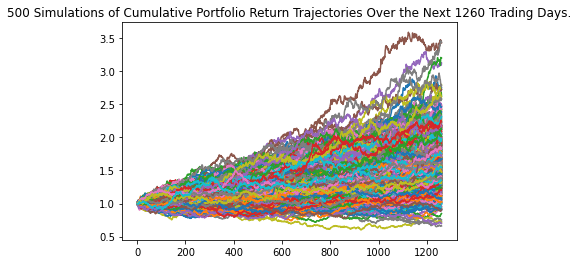

In [50]:
# Plot simulation outcomes
line_plot = MC_fiveyear.plot_simulation()

In [51]:
line_plot.get_figure().savefig("MC_fiveyear_sim_plot.png", bbox_inches="tight")

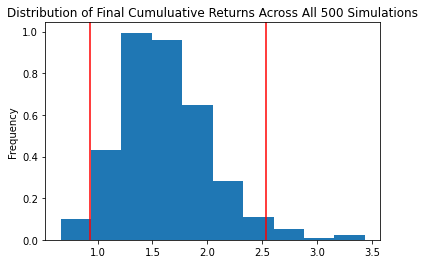

In [52]:
# Plot probability distribution and confidence intervals
distribution_plot = MC_fiveyear.plot_distribution()

In [53]:
distribution_plot.get_figure().savefig("fiveyear_dist_plot.png", bbox_inches="tight")

In [54]:
# Fetch summary statistics from the Monte Carlo simulation results
retirement_five_year = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(retirement_five_year)

count           500.000000
mean              1.610182
std               0.413676
min               0.661991
25%               1.324781
50%               1.570001
75%               1.856951
max               3.436534
95% CI Lower      0.927889
95% CI Upper      2.532693
Name: 1260, dtype: float64


In [55]:
# Set initial investment
initial_investment = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
lower_five = round(retirement[8]*60000,2)
upper_five = round(retirement[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${lower_five} and ${upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $265301.44 and $3193022.74


### Ten Years Retirement Option

In [56]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [57]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/createX/Documents/GitHub/api_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.981310,1.000055,0.994595,0.991834,0.998975,1.016894,0.991661,1.005404,1.004123,1.009476,...,0.992145,1.003491,0.997014,1.008511,0.991724,0.993092,0.988188,1.007146,0.992201,0.992996
2,0.980431,0.999865,1.000454,0.992124,1.003493,1.011435,0.995978,1.006153,1.012796,1.010295,...,0.982639,0.995717,0.988278,1.007022,0.995297,0.988757,0.973954,1.009236,0.995965,0.992161
3,0.980005,1.017835,0.998929,0.992906,1.006546,1.011081,0.996926,1.010363,1.022127,1.017775,...,0.988511,0.988608,0.998170,1.006311,1.001555,0.986978,0.972336,1.022697,1.003777,0.981032
4,0.984574,1.038291,1.007318,1.003187,0.998107,1.018813,1.014605,1.019431,1.046018,1.022596,...,0.989278,0.984442,0.992374,1.011555,0.993790,0.981917,0.972863,1.027915,1.015012,0.975820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.431169,1.750353,3.692133,2.385831,3.576349,2.051033,3.247543,2.073622,3.783994,3.744298,...,2.687769,2.052184,2.259357,2.937850,0.997137,1.799710,3.598538,1.666454,2.560342,2.331850
2517,1.439580,1.754093,3.704112,2.398882,3.639932,2.055554,3.239092,2.105912,3.793672,3.723226,...,2.678356,2.032978,2.269529,2.959651,1.002282,1.808975,3.608068,1.653352,2.553889,2.343263
2518,1.459453,1.765593,3.715047,2.373657,3.651800,2.070730,3.223427,2.110081,3.798368,3.770789,...,2.668861,2.027943,2.279768,2.963690,0.998087,1.818021,3.603647,1.651782,2.535493,2.315775
2519,1.461221,1.776448,3.695458,2.366097,3.652817,2.078316,3.222556,2.104577,3.821448,3.743801,...,2.628213,2.018914,2.281026,2.950160,0.996755,1.834862,3.588453,1.648422,2.541969,2.279061


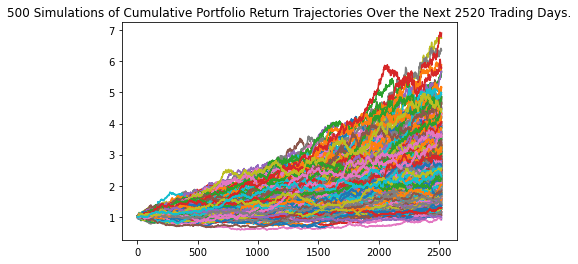

In [60]:
# Plot simulation outcomes
line_plot = MC_ten_year.plot_simulation()

In [61]:
line_plot.get_figure().savefig("MC_ten_year_sim_plot.png", bbox_inches="tight")

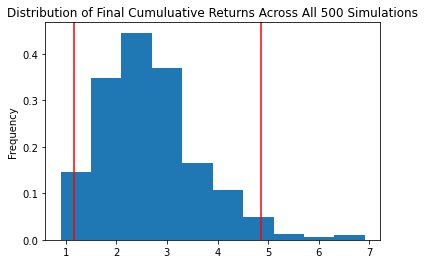

In [62]:
# Plot probability distribution and confidence intervals
distribution_plot = MC_ten_year.plot_distribution()

In [63]:
distribution_plot.get_figure().savefig("tenyear_dist_plot.png", bbox_inches="tight")

In [64]:
# Fetch summary statistics from the Monte Carlo simulation results
retirement_ten_year = MC_ten_year.summarize_cumulative_return()

# Print summary statistics
print(retirement_ten_year)

count           500.000000
mean              2.674250
std               0.973015
min               0.898320
25%               2.014170
50%               2.565018
75%               3.172218
max               6.911096
95% CI Lower      1.160972
95% CI Upper      4.851574
Name: 2520, dtype: float64


In [65]:
# Set initial investment
initial_investment = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(retirement[8]*60000,2)
ci_upper_ten = round(retirement[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $265301.44 and $3193022.74
